C:\Users\ACER\AppData\Local\Temp\ipykernel_9708\1200125406.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_distribution.values, y=team_distribution.index, palette='viridis')


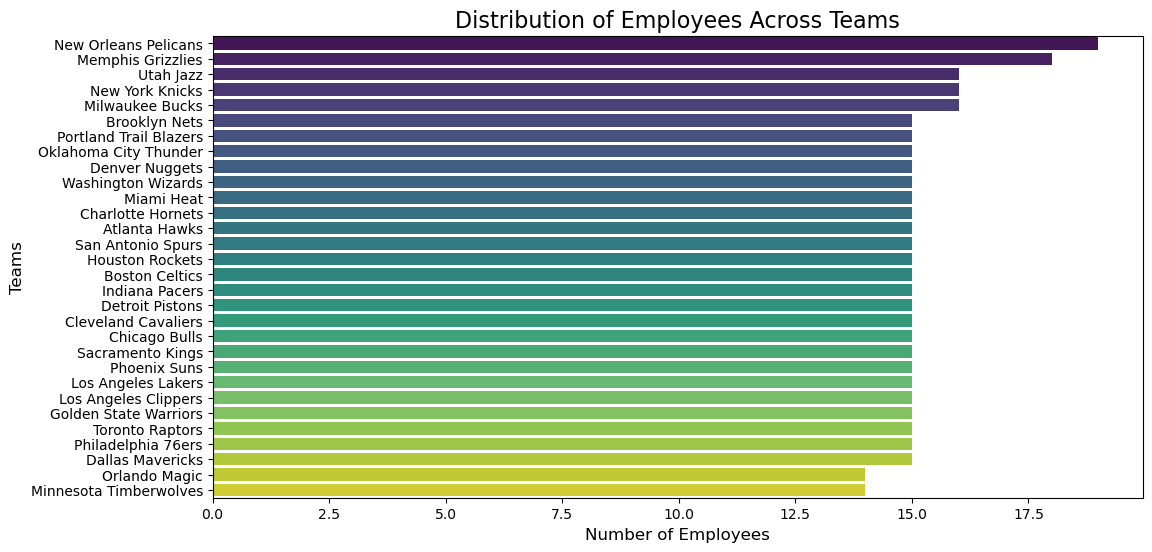

Team Distribution (%):
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3

C:\Users\ACER\AppData\Local\Temp\ipykernel_9708\1200125406.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_distribution.values, y=position_distribution.index, palette='muted')


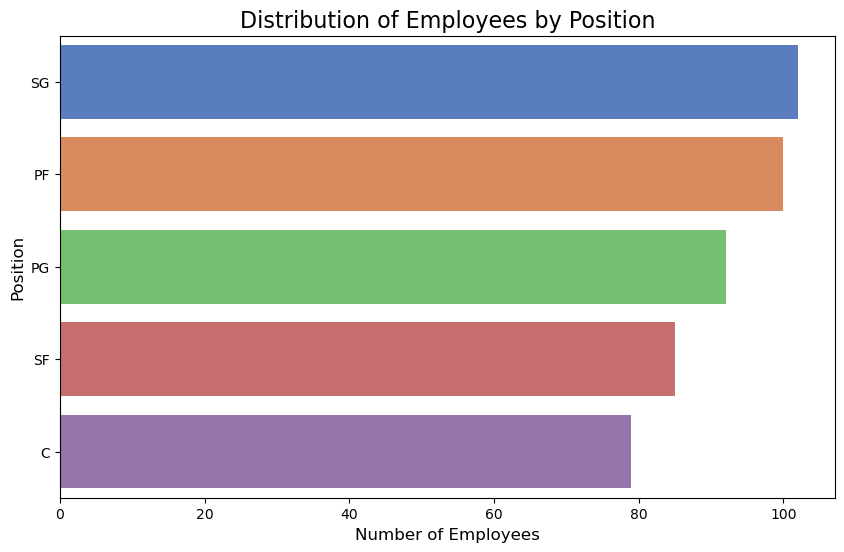

Position Distribution:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


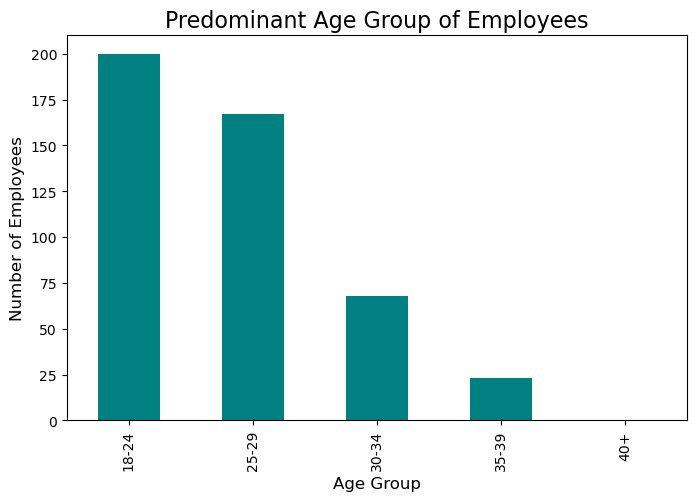

Age Group Distribution:
Age Group
18-24    200
25-29    167
30-34     68
35-39     23
40+        0
Name: count, dtype: int64


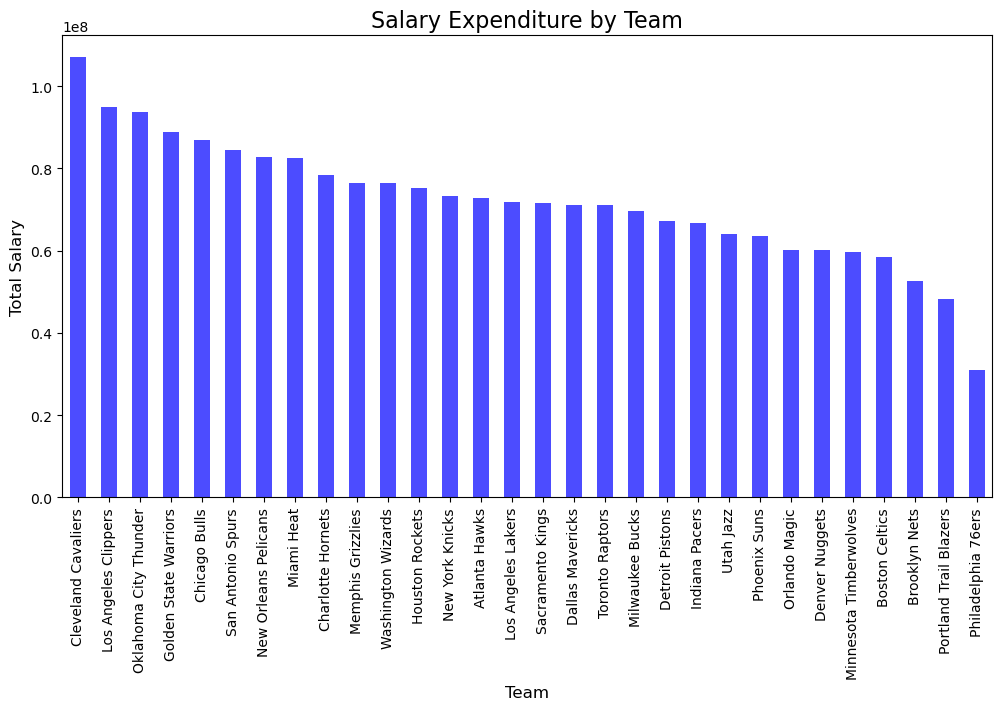

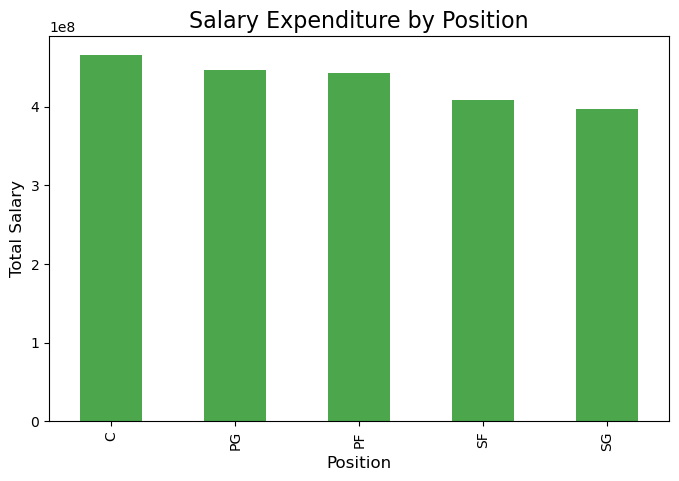

Team with highest salary expenditure: Cleveland Cavaliers
Position with highest salary expenditure: C


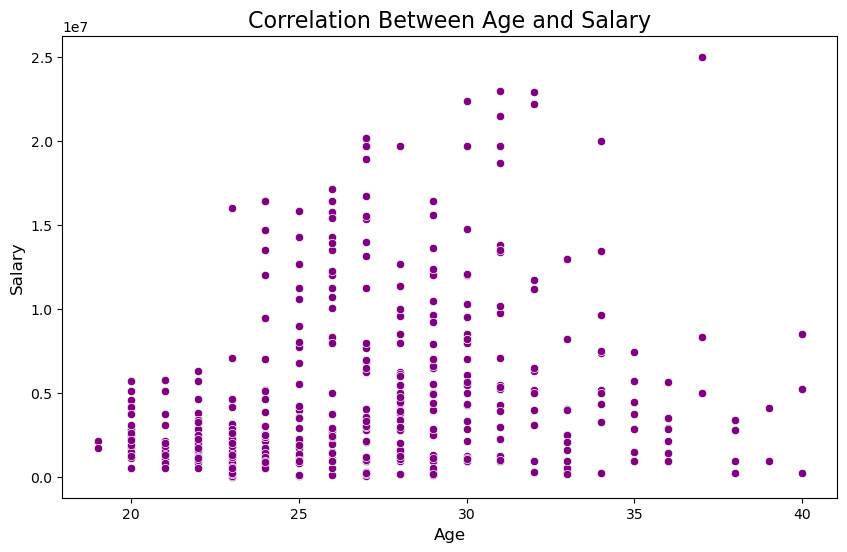

Correlation between Age and Salary: 0.21400941226570955

--- Data Story ---
1. Team Distribution: New Orleans Pelicans has the highest number of employees.
2. Position Distribution: SG is the most common position.
3. Predominant Age Group: 18-24 is the largest age group.
4. Salary Expenditure: Cleveland Cavaliers has the highest expenditure by team, and C by position.
5. Age-Salary Correlation: The correlation coefficient is 0.21, indicating a positive relationship.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"D:\ENTRI\phython\myex.csv")  

data['Height'] = np.random.randint(150, 181, size=len(data))

# --- ANALYSIS TASKS ---

team_distribution = data['Team'].value_counts()
team_percentage = (team_distribution / len(data)) * 100

# Visualization: Team distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=team_distribution.values, y=team_distribution.index, palette='viridis')
plt.title('Distribution of Employees Across Teams', fontsize=16)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Teams', fontsize=12)
plt.show()

print("Team Distribution (%):")
print(team_percentage)

# 2. Segregate employees by position
position_distribution = data['Position'].value_counts()

# Visualization: Position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_distribution.values, y=position_distribution.index, palette='muted')
plt.title('Distribution of Employees by Position', fontsize=16)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.show()

print("Position Distribution:")
print(position_distribution)

# 3. Identify the predominant age group among employees
age_bins = [18, 25, 30, 35, 40, 50]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

age_group_distribution = data['Age Group'].value_counts()

# Visualization: Age group distribution
plt.figure(figsize=(8, 5))
age_group_distribution.sort_index().plot(kind='bar', color='teal')
plt.title('Predominant Age Group of Employees', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.show()

print("Age Group Distribution:")
print(age_group_distribution)

# 4. Identify the team and position with the highest salary expenditure
team_salary = data.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = data.groupby('Position')['Salary'].sum().sort_values(ascending=False)

highest_salary_team = team_salary.idxmax()
highest_salary_position = position_salary.idxmax()

# Visualization: Salary expenditure by team and position
plt.figure(figsize=(12, 6))
team_salary.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Salary Expenditure by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Salary', fontsize=12)
plt.show()

plt.figure(figsize=(8, 5))
position_salary.plot(kind='bar', color='green', alpha=0.7)
plt.title('Salary Expenditure by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Total Salary', fontsize=12)
plt.show()

print(f"Team with highest salary expenditure: {highest_salary_team}")
print(f"Position with highest salary expenditure: {highest_salary_position}")

# 5. Investigate correlation between age and salary
age_salary_correlation = data[['Age', 'Salary']].corr().iloc[0, 1]

# Visualization: Age vs Salary correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data, color='purple')
plt.title('Correlation Between Age and Salary', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

print(f"Correlation between Age and Salary: {age_salary_correlation}")

# --- DATA STORY ---
# Summarize insights:
print("\n--- Data Story ---")
print(f"1. Team Distribution: {team_percentage.idxmax()} has the highest number of employees.")
print(f"2. Position Distribution: {position_distribution.idxmax()} is the most common position.")
print(f"3. Predominant Age Group: {age_group_distribution.idxmax()} is the largest age group.")
print(f"4. Salary Expenditure: {highest_salary_team} has the highest expenditure by team, "
      f"and {highest_salary_position} by position.")
print(f"5. Age-Salary Correlation: The correlation coefficient is {age_salary_correlation:.2f}, "
      f"indicating a {'positive' if age_salary_correlation > 0 else 'negative' if age_salary_correlation < 0 else 'neutral'} relationship.")
